In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras import datasets, layers, models
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
# struct = ['conv_16']*2 + ['pool'] + ['conv_32']*3 + ['pool'] + ['conv_64']*3 + ['pool'] + ['FC_128']*2 # VGGlite
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(16,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(train_images.shape)
output = model.fit(train_images, train_labels, epochs=10)

(60000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1501 - accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0510 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0398 - accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0333 - accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0310 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0253 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0245 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0210 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0203 - accuracy: 0.9938
Epoch 10/10
1875/1875 [=========================

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

model.save(r"./VGGlite_mode.h5")

313/313 - 4s - loss: 0.0319 - accuracy: 0.9912 - 4s/epoch - 14ms/step

Test accuracy: 0.9911999702453613


KeyError: 'val_accuracy'

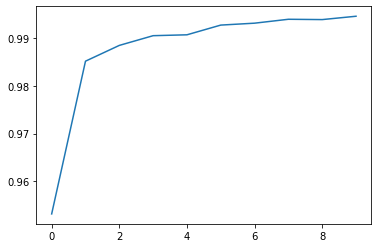

In [8]:
plt.plot(output.history['accuracy'], label='accuracy')
plt.plot(output.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()